# PRACTICA N°5

##### **TEMA:** _SESGO Y VARIANZA_

##### **INTEGRANTES:** 
#####                 _José Cueva_
#####                 _Estefanía Quimbiulco_

**Objetivos**
+ Analizar un dataset para obtener un modelo de predicción aplicando algoritmos de aprendizaje automático
+ Realizar un análisis estadístico y de variables del dataset.
+ Analizar sesgo y varianza en el modelo de predicción obtenido.
+ Implementar regularización y analizar los valores óptimos de lambda que se pueden aplicar para mejorar el rendimiento del modelo de predicción.
+ Familiarizarse con el uso de phyton para realizar el análisis de un conjunto de datos aplicando las librerías de modelado de datos.


In [1]:
import pandas as pd

In [2]:
path="estudiantes.csv"

In [3]:
df=pd.read_csv(path)

**Análisis general del dataset:**

+ Determinar el **tamaño del dataset** (Número de Registros y número de variables).

In [4]:
df.count()
#Respuesta:número de variables 6 cada uno con 1000 registros

gender                         1000
race/ethnicity                 1000
parental level of education    1000
lunch                          1000
test preparation course        1000
math score                     1000
dtype: int64

+ Determinar el **tipo de dato** de cada una de las variables del dataset.

In [5]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
dtype: object

+ Determine la **variable de salida** o etiqueta del dataset.

In [6]:
# la variable de salida en nuestro caso es Math-score

+ Modifique las variables: **gender, race/ethnicity, parental level of education, lunch, test preparation course** a numéricas. Asignar valores de acuerdo a la categoría a la que pertenecen, a la vez transformar el tipo de dato.


In [7]:
df["gender"]=df["gender"].replace("female",0)
df["gender"]=df["gender"].replace("male",1)

In [8]:
df["race/ethnicity"]=df["race/ethnicity"].replace("group A",0)
df["race/ethnicity"]=df["race/ethnicity"].replace("group B",1)
df["race/ethnicity"]=df["race/ethnicity"].replace("group C",2)
df["race/ethnicity"]=df["race/ethnicity"].replace("group D",3)
df["race/ethnicity"]=df["race/ethnicity"].replace("group E",4)

In [9]:
df["parental level of education"]=df["parental level of education"].replace("bachelor's degree",0)
df["parental level of education"]=df["parental level of education"].replace("some college",1)
df["parental level of education"]=df["parental level of education"].replace("master's degree",2)
df["parental level of education"]=df["parental level of education"].replace("associate's degree",3)
df["parental level of education"]=df["parental level of education"].replace("high school",4)
df["parental level of education"]=df["parental level of education"].replace("some high school",5)

In [10]:
df["lunch"]=df["lunch"].replace("standard",0)
df["lunch"]=df["lunch"].replace("free/reduced",1)

In [11]:
df["test preparation course"]=df["test preparation course"].replace("none",0)
df["test preparation course"]=df["test preparation course"].replace("completed",1)

+ Calcular la **correlación** existente entre todas las variables del dataset, empleando un mapa de calor. (Considere variables numéricas)

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

<AxesSubplot:>

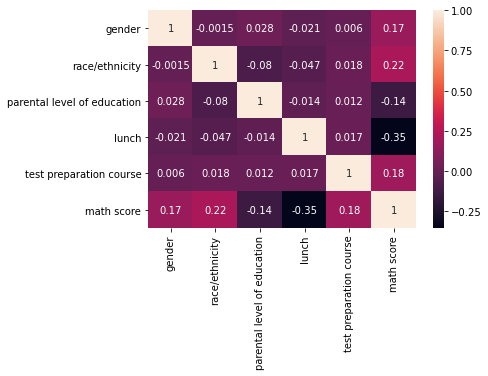

In [13]:
sns.heatmap(df.corr(),annot=True)

**Modelo de Predicción**

Obtener un modelo de predicción del dataset:

+ ¿Cuál es el objetivo del modelo?

In [14]:
# El objetivo es encontrar un modelo adecuado que nos permita predecir la nota obtenida en la materia de matemáticas.

+ ¿Cuál o cuáles algoritmos de aprendizaje automático puede aplicar para obtener el modelo y por qué?


In [15]:
# Regresión Lineal multivariante debido a que la variable de salida en cuantitativa.

Recomendaciones para obtener el modelo:

+ Seleccionar más de una variable de entrada con la finalidad demejorar el aprendizaje. 

In [16]:
# las variables de entrada son: "race/ethnicity", "parental level of education", "test preparation course"

+ Implementar mecanismos que permitan evaluar el modelo obtenido.

In [20]:
x=df[["race/ethnicity", "parental level of education", "test preparation course"]]
y=df["math score"]

In [18]:
import sklearn.model_selection as ms
x_train, x_test, y_train, y_test=ms.train_test_split(x,y,train_size=0.70,test_size=0.30,random_state=101)

In [21]:
print("numero de registros de conjunto de prueba: ",x_test.shape[0])
print("numero de registros de conjunto de entrenamiento: ",x_train.shape[0])

numero de registros de conjunto de prueba:  300
numero de registros de conjunto de entrenamiento:  700


In [22]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [23]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
h=lm.predict(x_test)

In [25]:
print("Primer valor de y_test, VALOR REAL = ", y_test.head(1))
print ("Primer valor de la hipótesis h, VALOR ESTIMADO = ", h[0])

Primer valor de y_test, VALOR REAL =  545    78
Name: math score, dtype: int64
Primer valor de la hipótesis h, VALOR ESTIMADO =  72.71655059824056


+ Determinar el rendimiento del modelo empleando métricas adecuadas. Interpretar las métricas obtenidas.

In [26]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, h)
print("MSE del modelo es: ",mse)

MSE del modelo es:  180.72414806828266


In [34]:
from sklearn.metrics import r2_score
r2= r2_score(y_test, h)
print("El r2 del modelo es ", r2*100, "%") 

El r2 del modelo es  8.349730511379738 %


**Sesgo y varianza**

+ Aplique Funciones Polinomiales para aumentar las características del modelo y mejorar las métricas obtenidas. Seleccione según su criterio un grado polinomial.

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
pr=PolynomialFeatures(degree=3)
xtrain_pr=pr.fit_transform(x_train)
xtest_pr= pr.fit_transform(x_test)

In [30]:
poly=LinearRegression()
poly.fit(xtrain_pr,y_train)
hipotesisPoly=poly.predict(xtest_pr)

+ Realice la gráfica de error obtenido para los conjuntos de entrenamiento y prueba/validación. La gráfica determinará el MSE en función del grado polinomial (Se deben aplicar varios grados polinomiales).

In [31]:
import matplotlib.pyplot as plt


In [32]:
#Creamos vectores para guardar los errores MSE del conjunto de entrenamiento y prueba
MSE_test=[]
MSE_train=[]
#Creamos un vector con los grados polinomiales
orden =[0,1,2,3,4,5]
#Creamos un lazo para calcular el MSE para cada orden polinomial
for n in orden:
    #Función polinomial para aumentar las características de entrada
    pr=PolynomialFeatures(degree=n)
    #Regresión lineal para realizar el ajuste, la hipótesis -->obtener el modelo
    lr=LinearRegression()
    #Modificar las variables de entrada para cada conjunto
    x_train_pr=pr.fit_transform(x_train)
    x_test_pr=pr.fit_transform(x_test)
    #Ajuste con Regresión Lineal
    #Se debe analizar tanto el conjunto de prueba como entrenamiento
    #para el conjunto de entrenamiento
    lr.fit(x_train_pr, y_train)
    #para el conjunto de prueba
    lr.fit(x_test_pr, y_test)
    #Hipótesis
    #para el conjunto de prueba
    htest=lr.predict(x_test_pr)
    #para el conjunto de entrenamiento
    htrain=lr.predict(x_train_pr)
    #Calcular los MSE y guardar en los vectores
    MSE_train.append(mean_squared_error(htrain, y_train))
    MSE_test.append(mean_squared_error(htest, y_test))

Text(0.5, 1.0, 'MSE DE CONJUNTO DE ENTRENAMIENTO Y CONJUNTO DE PRUEBA')

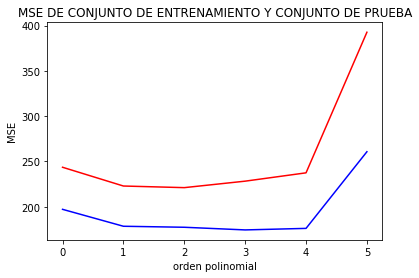

In [33]:
#Graficar
plt.plot(orden,MSE_train,'r')
plt.plot(orden,MSE_test,'b')
plt.xlabel("orden polinomial")
plt.ylabel("MSE")
plt.title("MSE DE CONJUNTO DE ENTRENAMIENTO Y CONJUNTO DE PRUEBA")

+ Determine el grado polinomial más adecuado para mejorar el rendimiento del modelo. Justifique su respuesta.

In [ ]:
# El grado polinomial más adecuado entre los dos conjuntos está entre [1 y 2]

+ Realice una gráfica que permita determinar el comportamiento de la métrica R^2 en función del grado polinomial.

In [35]:
# Declarar vectores para almacenar los valores de R2 para entrenamiento y prueba 
R2_train=[]
R2_test=[]
# Grados polinomiales que se van a evaluar
orden=[0,1,2,3,4,5,10]
#Creamos un lazo para calcular R2 para c/grado_polinomial
for n in orden:
    pr=PolynomialFeatures(degree=n)
    lr=LinearRegression()
    xtrain_pr=pr.fit_transform(x_train)
    xtest_pr=pr.fit_transform(x_test)
    lr.fit(xtrain_pr,y_train)
    lr.fit(xtest_pr,y_test)
    #Calcular el R2 para entrenamiento y prueba
    R2_train.append(lr.score(xtrain_pr,y_train))
    R2_test.append(lr.score(xtest_pr,y_test))

No handles with labels found to put in legend.


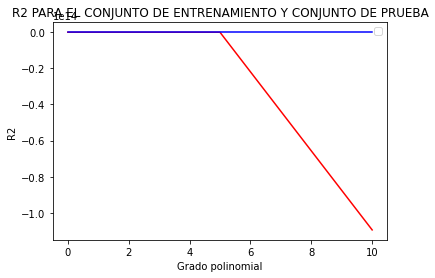

In [36]:
plt.plot(orden,R2_train,'r')
plt.plot(orden,R2_test,'b')
plt.xlabel("Grado polinomial")
plt.ylabel("R2")
plt.title("R2 PARA EL CONJUNTO DE ENTRENAMIENTO Y CONJUNTO DE PRUEBA")
plt.legend()

+ Obtenga nuevamente las métricas para el modelo de predicción aplicando funciones polinomiales.

In [37]:
msep=mean_squared_error(hipotesisPoly,y_test)
r2poly=r2_score(hipotesisPoly,y_test)
print ("MSE del modelo es:",msep)
print ("r2 dle modelo es:", r2poly*100)

MSE del modelo es: 184.98976344362208
r2 dle modelo es: -569.5826423662157


**Regularización**

+ Aplique Regularización al modelo de predicción obtenido. Seleccione un valor de lambda según su criterio.

In [38]:
from sklearn.linear_model import Ridge

In [39]:
x_train=x_train[["race/ethnicity", "parental level of education", "test preparation course"]]
x_test=x_test[["race/ethnicity", "parental level of education", "test preparation course"]]
pr=PolynomialFeatures(degree=5)
xtrain_pr1=pr.fit_transform(x_train)
xtest_pr1=pr.fit_transform(x_test)

+ Realice la gráfica de error obtenido para los conjuntos de entrenamiento y prueba/validación para distintos valores de lambda. La gráfica determinará el MSE en función del valor de lambda (Se deben aplicar varios valores de lambda).

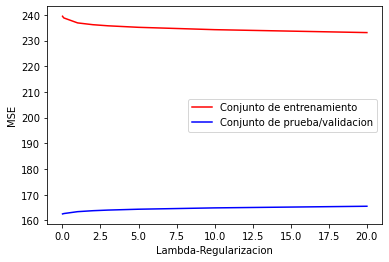

In [42]:
# crear un lazo para calcular el MSE para cada valor de LAMBA (Regularizacion)
Error_train=[]
Error_test=[]
LAMBDA=[0.01,0.05,0.1,1,2,3,5,10,20]
#lazo para calcular MSE para c/lambda
for factor in LAMBDA:
    RidgeR=Ridge(alpha=factor)
    RidgeR.fit(xtrain_pr1,y_train)
    RidgeR.fit(xtest_pr1,y_test)
    h_train1=RidgeR.predict(xtrain_pr1)
    h_test1=RidgeR.predict(xtest_pr1)
    #Calcular MSE
    Error_train.append(mean_squared_error(y_train,h_train1))
    Error_test.append(mean_squared_error(y_test,h_test1))

plt.plot(LAMBDA,Error_train,'r',label="Conjunto de entrenamiento")
plt.plot(LAMBDA,Error_test,'b',label="Conjunto de prueba/validacion")
plt.xlabel("Lambda-Regularizacion")
plt.ylabel("MSE")
plt.legend()

+ Determine el valor ideal de lambda que se debería aplicar para mejorar el modelo de predicción. Justifique su respuesta.

In [ ]:
# Como podemos observar en la gráfica el valor más bajo de MSE es cuando no se aplica regularización en el conjunto de prueba, pero
# en cambio en el conjunto de entrenamiento en el mismo punto produce una subida de MSE.
# Por otro lado al seguir analizando la gráfica se puede decir que un valor de lambda ideal es de 5 para el conjunto de entrenamiento,
#ya que disminuye el error, y en el conjunto de prueba tiene una ligera subida.

+ Obtenga nuevamente las métricas para el modelo de predicción al aplicar regularización.

In [43]:
mseR=mean_squared_error(h_test1,y_test)
r2R=r2_score(h_test1,y_test)
print ("MSE del modelo es:",mseR)
print ("r2 dle modelo es:", r2R*100)

MSE del modelo es: 165.50672417044956
r2 dle modelo es: -479.71316038729253


**Tabla comparativa**

* | Regresión Lineal | Función Polinomial | Regularización 
--|--|--|--
MSE| 180.72414806828266 | 184.98976344362208 | 165.50672417044956
R2| 8.349730511379738 % | -569.5826423662157 % | -479.71316038729253%

In [ ]:
# Al observar el mapa de calor de las correlaciones que existen entre las variables de entrada con la variable de salida, se nota
#claramente que son muy bajas, y que posiblemente nuestro conjunto de datos no sea adecuado para el análisis. Sin embargo, fue necesario 
# calcular las diferentes métricas que observamos en la tabla comparativa, como podemos ver el MSE obtenido aplicando Regresión Lineal, 
#Función Polinomial y Regularización es muy alto y su R2 incluso son negativos, podemos concluir que el Dataset no presenta una buena
#dependencia estadística de los datos y por ende no permite generar un buen modelo de predicción.